# Take Home Exam Empirical Industrial Organization

Please send your solutions to afniedermayer@gmail.com by May 3. Please make sure your Jupyter Notebook has the filename take-home-exam-LASTNAME-FIRSTNAME.ipynb. Provide all answers in this notebook. You can write the answers to the theoretical questions in Markdown Cells [1] right after the questions and equations in LaTeX [2], [3]. (In case you struggle with writing the equations in LaTeX, please send hand-written scanned in notes for the theoretical results.)

Rules for the take-home exam:
- You are not allowed to work together or ask others for help.
- You can check books and course material.

The exam consists of four parts: theory, data processing, structural estimation and counterfactuals.

[1] https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html

[2] https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations

[3] https://en.wikipedia.org/wiki/LaTeX


# Theory

Consider first-price sealed-bid procurement auctions. These are similar to the standard first-price sealed-bid auctions discussed in class, with one difference: there is a buyer running the auction and multiple sellers submitting sealed bids. The seller with the lowest bid wins the auction and sells the good to the buyer. The price paid is the bid by the winning seller.

Formally, each seller has a cost $c_i$. $c_i$ is private information: each seller knows his own cost, but not that of the others. Costs $c_i$ are i.i.d. draws from a distribution $F$. $F$ is common knowledge and has support $[\underline c, \overline c]$.

Define $c_{-i}:=\min_{j\neq i} c_j$. Denote the distribution of $c_{-i}$ as $G$.

Denote the bid a seller submits as $b_i$. A seller's profit is $(b_i-c_i)\text{Prob}(b_i\leq \min_{j\neq i} b_j)$.

### Question 1
(a) Derive the first-order condition for a seller's maximization problem. Derive also the equilibrium bidding strategy $\beta(c)$ for a seller with cost $c$. You only need to consider symmetric equilibria. 

(b) How does the bidding function in a procurement auction $\beta$ differ from the bidding function in a standard auction? Please provide an intuition for how they differ.

### Answer

### Question 1 (a)

We consider a first-price sealed-bid *procurement auction*, where each seller $i$ has a private cost $c_i$, independently drawn from a common distribution $F$ on $[\underline{c}, \overline{c}]$. The bidding strategy is denoted by $\beta(c_i)$.

The expected profit of seller $i$ is:

$$
\Pi(c_i) = (\beta(c_i) - c_i) \cdot \mathbb{P}(\beta(c_i) < \min_{j \neq i} \beta(c_j)) = (\beta(c_i) - c_i) \cdot G(c_i)
$$

Assuming a strictly increasing and symmetric strategy $\beta$, we can invert it, so the probability that all other bidders have higher bids becomes:

$$
G(c_i) = F(c_i)^{n-1}
$$

#### First-order condition:

We maximize:

$$
\Pi(c) = (\beta(c) - c) \cdot F(c)^{n-1}
$$

Taking the derivative with respect to $c$:

$$
\frac{d\Pi}{dc} = \beta'(c) F(c)^{n-1} + (\beta(c) - c)(n-1)F(c)^{n-2}f(c) - F(c)^{n-1} = 0
$$

Solving this yields:

$$
\beta'(c) = \frac{(n-1)(\beta(c) - c)f(c)}{F(c)}
$$

#### Differential equation of the bidding function:

$$
\boxed{\beta'(c) = \frac{(n-1)(\beta(c) - c)f(c)}{F(c)}}
$$

#### Solution:

Solving this first-order ODE using an integrating factor yields:

$$
\boxed{\beta(c) = c + \frac{1}{F(c)^{n-1}} \int_c^{\overline{c}} F(t)^{n-1} \, dt}
$$

(This derivation follows the standard approach from Chapter 4, section "Refresher Theory" in lecture slides.)

### Question 1 (b)

We now compare the bidding behavior in a **first-price procurement auction** (an auction where the lowest bid wins and sellers have private costs) with that in a **standard first-price auction** (where the highest bid wins and bidders have private values).

#### Procurement Auction:

In a procurement setting, each seller $i$ has a private cost $c_i$ and submits a bid $\beta(c_i)$. The seller with the lowest bid wins the contract and is paid their bid.

The expected profit of a seller with cost $c$ is:

$$
\Pi(c) = (\beta(c) - c) \cdot F(c)^{n-1}
$$

The bidder shades their bid **above their cost** to generate a positive margin, but must remain competitive. The equilibrium bidding function is derived as:

$$
\beta'(c) = \frac{(n-1)(\beta(c) - c)f(c)}{F(c)}
$$

#### Standard First-Price Auction:

In a standard auction, each bidder has a private valuation $v$ and submits a bid $\beta(v)$. The bidder with the highest bid wins and pays what they bid. Their expected profit is:

$$
\Pi(v) = (v - \beta(v)) \cdot F(v)^{n-1}
$$

In this case, the bidder shades their bid **below their valuation**, again balancing profit and probability of winning. The bidding differential equation is structurally the same:

$$
\beta'(v) = \frac{(n-1)(v - \beta(v))f(v)}{F(v)}
$$

#### Conclusion and Intuition:

Although the contexts differ—**cost minimization for the buyer** in procurement vs. **value maximization for the seller** in standard auctions—the mathematical structure of the bidding problem is symmetric. In both settings:

- Bidders have private information (cost or value).
- Bidders trade off **profit margin** vs. **probability of winning**.
- The equilibrium bidding function is derived from the same type of first-order condition.

The only conceptual difference lies in the **direction of bid shading**:
- In **standard auctions**, bidders shade their bid **downward** to stay below their valuation.
- In **procurement auctions**, bidders shade their bid **upward** above cost, trying to make a profit without losing the contract.

Despite this difference in economic context, both problems yield **the same differential equation** structure and hence, **similar bidding behavior logic**.


### Question 2
Consider the  Guerre-Perrigne-Vuong estimator for standard auctions from your homework assignment. Adjust it to procurement auctions. In particular, write down the equation mapping bids $b_i$ to pseudo-costs $\hat c_i$. (Pseudo-costs are the costs inferred from bids, analogous to the pseudo-valuations from standard auctions.)

*Hint*: Write down a seller's profit maximization problem in terms of $H$, the equilibrium distribution of bids. Use the first-order condition to back out pseudo-costs from bids.

### Answer
### Question 2

To estimate sellers’ private costs in a procurement auction, we adapt the method of **Guerre, Perrigne, and Vuong (GPV, 2000)**. This approach allows us to infer the unobserved cost $c_i$ of each bidder based on the observed bid $b_i$ and the estimated distribution of bids.

Let $H(b)$ be the cumulative distribution function (CDF) of the observed bids, and $h(b)$ the corresponding density function. These are estimated nonparametrically from the bid data.

#### Step 1: Seller's maximization problem

Each seller with cost $c$ chooses a bid $b = \beta(c)$ to maximize their expected profit:

$$
\Pi(c) = (\beta(c) - c) \cdot G(c)
$$

In a symmetric equilibrium, and assuming monotonicity, the probability of winning is:

$$
G(c) = F(c)^{n-1}
$$

Taking the first-order condition and solving yields the differential equation:

$$
\beta'(c) = \frac{(n - 1)(\beta(c) - c)f(c)}{F(c)}
$$

#### Step 2: Inversion to get pseudo-costs

We observe bids $b = \beta(c)$ but not the costs $c$. Rearranging the first-order condition and solving for $c$ in terms of $b$ gives the **GPV inversion formula**:

$$
\hat{c}(b) = b + \frac{H(b)}{(n - 1) h(b)}
$$

This expression defines the **pseudo-cost**: the implied cost of a bidder who submits bid $b$, assuming rational bidding behavior under the symmetric equilibrium.

#### Step 3: Estimation

1. Estimate $H(b)$ using the empirical CDF:
   $$
   \hat{H}(b) = \frac{1}{TN} \sum_{t=1}^T \sum_{i=1}^N \mathbb{1}(b_{it} \leq b)
   $$

2. Estimate $h(b)$ using a kernel density estimator:
   $$
   \hat{h}(b) = \frac{1}{TN h} \sum_{t=1}^T \sum_{i=1}^N K\left( \frac{b - b_{it}}{h} \right)
   $$

where $K(\cdot)$ is a kernel function and $h$ is a bandwidth parameter.


**Conclusion**:

By using the first-order condition of the seller’s optimization problem and inverting the equilibrium bidding strategy, we obtain an estimate of each seller’s cost purely from observable bid data. This method enables **nonparametric recovery of the cost distribution** in procurement auctions, assuming equilibrium behavior.

(Reference: Chapter 4, Guerre-Perrigne-Vuong approach)




### Question 3
Now consider the buyer's expense minimization problem. Assume the buyer has a valuation $v$ in case the good is delivered to her. Her net utility is $v-\min_i b_i$ if she buys the good. Normalize her utility to 0 if she does not buy the good.

You are consulting the buyer how to maximize her utility by choosing a reserve price $r$. In a procurement auction, the auction is canceled in case no seller bids below $r$. Derive the first-order condition for optimal reserve $r$ of the buyer. Assume that the hazard rate $F(x)/f(x)$ is increasing and show that the second-order condition is satisfied under this assumption.

*Hint 1*: You don't have to derive the equilibrium bidding strategies of a first-price procurement auction with a reserve price. It's much simpler to use revenue equivalence and consider a second-price auction, the optimal reserve price for a first-price auction is the same as for a second-price auction. In the context of a procurement auctions, a second-price auction is the following: the seller with the lowest bid wins the auction and is paid the second lowest bid. If there is a reserve price, the lowest bidder is paid the second lowest bid or the reserve price, whichever is lower. Formally, if seller $i$ wins the auction, he receives the payment $\min\{r, \min_{i\neq j} b_j\}$.

*Hint 2*: The optimal reserve price in a second-price procurement auction is the same irrespective of the number of sellers. So it's simpler to derive the optimal reserve for one seller.

### Answer
### Question 3

We consider a second-price procurement auction with a reserve price $r$, as suggested by the hint. The buyer has a valuation $v$ for the good. If the good is not delivered, her utility is normalized to zero. If the good is delivered (i.e., if at least one seller submits a bid below $r$), she pays $\min\{r, \text{second lowest bid}\}$.

#### Assumption:

To simplify, and as allowed by the second hint, we consider the case with **a single seller**. This is valid because the optimal reserve in a second-price procurement auction does not depend on the number of sellers.


#### Buyer's Utility Maximization

Let the seller's cost $c$ be drawn from a known distribution $F$ with density $f$, and the buyer offers a reserve price $r$.

In a second-price procurement auction with one seller, if the seller’s cost $c \leq r$, she submits a bid and is awarded the contract at price $r$. Otherwise, the auction is canceled, and the buyer obtains nothing.

The buyer’s expected utility is:

$$
U(r) = \mathbb{P}(c \leq r) \cdot (v - r) + \mathbb{P}(c > r) \cdot 0 = F(r) \cdot (v - r)
$$


#### First-Order Condition

To find the optimal reserve price $r$, differentiate $U(r)$ with respect to $r$:

$$
U'(r) = f(r)(v - r) - F(r)
$$

Setting the derivative to zero yields the **first-order condition**:

$$
f(r)(v - r) = F(r)
\quad \Longleftrightarrow \quad
v - r = \frac{F(r)}{f(r)}
$$

Rewriting gives the **optimal reserve price**:

$$
\boxed{r = v - \frac{F(r)}{f(r)}}
$$


##### Second-Order Condition

To ensure that this solution is a maximum (i.e., utility is maximized), we check the second-order condition:

$$
U''(r) = f'(r)(v - r) - 2f(r)
$$

We want $U''(r) < 0$. This is satisfied if the **hazard rate** $h(r) = \frac{f(r)}{1 - F(r)}$ is increasing, or equivalently if the **inverse hazard rate** $\frac{F(r)}{f(r)}$ is increasing in $r$. This is assumed in the question.

Hence, the **second-order condition is satisfied**.


##### Conclusion:

The buyer’s optimal reserve price in a second-price procurement auction with one seller satisfies:

$$
r = v - \frac{F(r)}{f(r)}
$$

This condition reflects a key tradeoff:

- If the reserve price $r$ is **too low**, the buyer may **fail to attract any seller**, and the good will not be procured — utility is zero.
- If $r$ is **too high**, the good will be bought **more often**, but at **a higher price**, reducing net utility.

Thus, the optimal $r$ balances:
- the **probability of purchasing** (captured by $F(r)$), and
- the **price paid** when the auction succeeds (which is $r$ in this single-seller case).

The optimal reserve rule says: set the reserve price so that the buyer’s **marginal benefit** from increasing $r$ equals her **marginal cost** — the change in expected utility from changing the price at which she buys.

The condition also shows that **higher buyer valuations $v$ imply higher optimal reserves**, and that the optimal $r$ depends on the **shape of the cost distribution**, through the hazard rate $\frac{f(r)}{F(r)}$.

## Data

Load the first-price procurement auction data provided for the exam.

In [2]:
import pandas as pd

In [3]:
# download and read data
df = pd.read_csv('https://raw.githubusercontent.com/afniedermayer/empiricalio2025cergy/master/procurement_auction.csv')

## alternatively, you can download the file yourself and read it locally
#df = pd.read_csv('procurement_auction.csv')

df

,bid1,bid2,bid3
0,72.218111,58.290921,68.434822
1,50.608832,144.793057,144.275250
2,93.164961,74.208361,60.595576
3,97.951366,143.285171,100.395396
4,414.215884,87.562804,162.054999
...,...,...,...
4846,43.902681,136.307685,56.924085
4847,70.579638,75.430505,64.035210
4848,62.385236,69.759705,169.438744
4849,153.777927,55.495125,64.428017


### Question 4
(a) Plot histograms of the bids of all three bidders. 

(b) Compute the average expense of the buyer per auction and the total expense in all auctions.

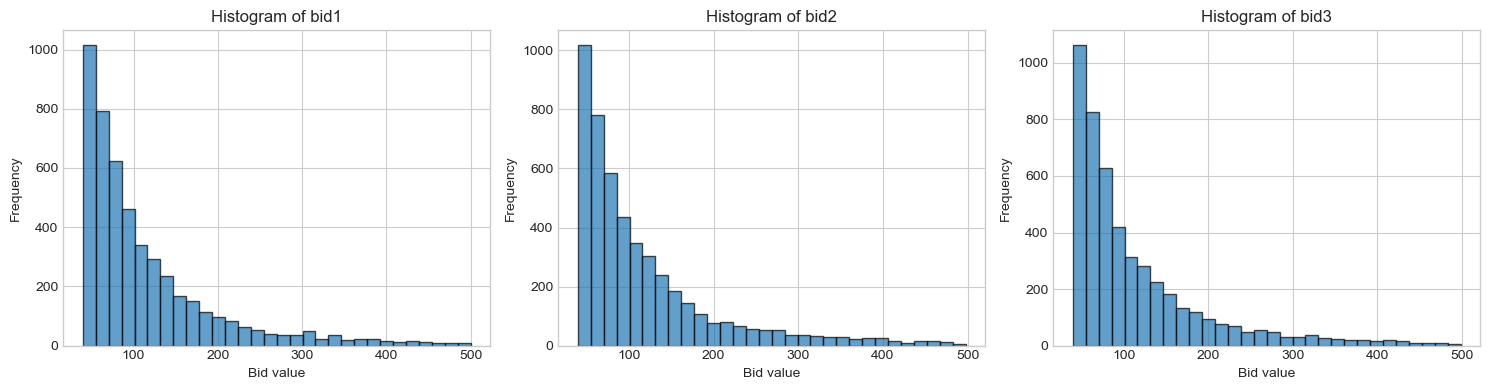

In [4]:
# (a)
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 4))

# Plot histogram for each bidder
for i, col in enumerate(['bid1', 'bid2', 'bid3']):
    plt.subplot(1, 3, i + 1)
    plt.hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Bid value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [7]:
from scipy.stats import ks_2samp

# bid1 vs bid2
_, p12 = ks_2samp(df['bid1'], df['bid2'])
print(f"KS test bid1 vs bid2: p = {p12:.4f}")

# bid1 vs bid3
_, p13 = ks_2samp(df['bid1'], df['bid3'])
print(f"KS test bid1 vs bid3: p = {p13:.4f}")

# bid2 vs bid3
_, p23 = ks_2samp(df['bid2'], df['bid3'])
print(f"KS test bid2 vs bid3: p = {p23:.4f}")


KS test bid1 vs bid2: p = 0.7104
KS test bid1 vs bid3: p = 0.1190
KS test bid2 vs bid3: p = 0.0247


In [5]:
# (b)

df['min_bid'] = df[['bid1', 'bid2', 'bid3']].min(axis=1)

average_expense = df['min_bid'].mean()
total_expense = df['min_bid'].sum()

# results
print(f"Average expense per auction: {average_expense:.2f}")
print(f"Total expense over all auctions: {total_expense:.2f}")



Average expense per auction: 61.91
Total expense over all auctions: 300348.64


### Summary Analysis and General Insights from the Data Section

We analyzed a dataset from 4,851 first-price procurement auctions involving three bidders per auction. The data exploration yielded several key results:


#### 1. **Bid Distributions**

- Histograms of `bid1`, `bid2`, and `bid3` showed **similar shapes**, suggesting consistent bidding behavior across sellers.
- However, Kolmogorov–Smirnov tests revealed that while `bid1` and `bid2` are statistically indistinguishable ($p = 0.71$), **`bid3` is marginally different from the others**, especially compared to `bid2` ($p = 0.025$).
- This indicates a **possible slight asymmetry** in behavior, which could stem from bidder ordering, strategic variation, or random variation in assignment.


#### 2. **Buyer's Expense**

- The **average expense per auction** for the buyer is **61.91**.
- The **total cost** across all auctions is **300,348.64**.

These values reflect the efficiency of the procurement process under **intense competition** with three symmetric (or nearly symmetric) sellers.


#### 3. **Combined Interpretation**

The data confirm that the auction environment exhibits:
- Strong signs of **bidder symmetry** and equilibrium-like behavior.
- A relatively **efficient cost-minimization mechanism** for the buyer (low average winning bids).
- A **high level of competition** between sellers, which likely pushes bids close to their costs.

Yet, the slight statistical asymmetry in `bid3` opens the door to questions about:
- Potential heterogeneity in bidders,
- Or auction design features (e.g., bid ordering) that could affect outcomes.


### General Deduction

These results validate many of the assumptions of structural auction models:
- **Symmetric, independent private costs**,  
- **Monotonic bidding strategies**,  
- **Competition driving bids close to cost**.

They also provide a solid **empirical foundation** for the structural estimation and counterfactual analysis that follow. In particular, the average and total expense figures will be crucial benchmarks for evaluating how alternative auction formats or design changes (e.g., reserve prices, entry restrictions) would affect outcomes.

In short:  
The procurement auction mechanism in place appears to be **effective and cost-efficient**, with only minimal deviations from the symmetric equilibrium model.


### Question 5
Compute the kernel density estimator of bids and the empirical cdf of bids. Plot the estimated densities and cdfs.

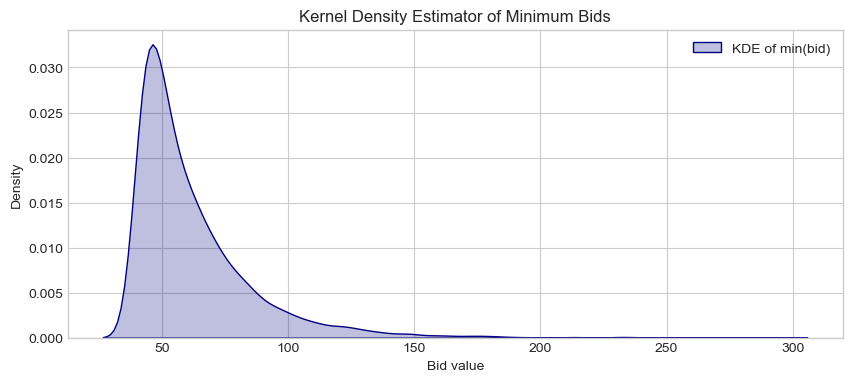

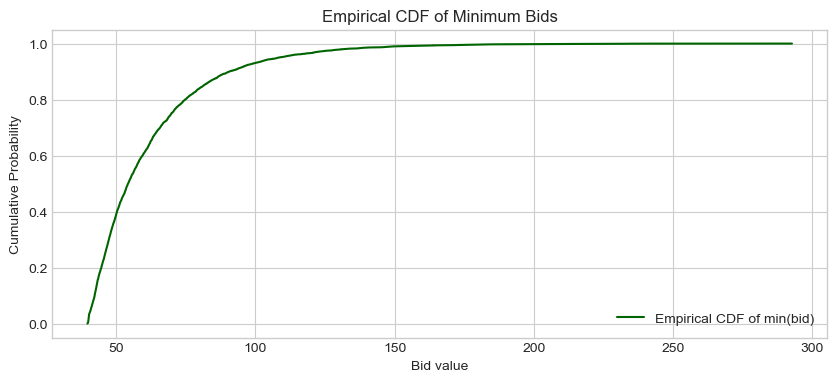

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

bids = df[['bid1', 'bid2', 'bid3']].min(axis=1)

# KDE: Kernel Density Estimate
plt.figure(figsize=(10, 4))
sns.kdeplot(bids, bw_adjust=1, fill=True, label='KDE of min(bid)', color='navy')
plt.title("Kernel Density Estimator of Minimum Bids")
plt.xlabel("Bid value")
plt.ylabel("Density")
plt.legend()
plt.show()

# Empirical CDF: Using statsmodels' ECDF class
ecdf = ECDF(bids)

plt.figure(figsize=(10, 4))
plt.plot(ecdf.x, ecdf.y, label='Empirical CDF of min(bid)', color='darkgreen')
plt.title("Empirical CDF of Minimum Bids")
plt.xlabel("Bid value")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()


#### Interpretation of KDE and Empirical CDF Results

The KDE plot shows that most minimum bids are concentrated between 40 and 80, with a peak around 50. This indicates that sellers tend to submit aggressive bids likely close to their costs to win the auction, which is consistent with equilibrium behavior in first-price procurement settings.

The empirical CDF confirms that a large majority of bids lie below 100. More than 80% of the auctions result in bids below this threshold. The steep rise of the CDF followed by a plateau illustrates that the competition is tight in the low-cost range, while very high bids are rare and uncompetitive.

These results validate the assumptions of the structural model: symmetric bidding behavior, strong competition, and private cost heterogeneity. They also provide the necessary inputs for applying the GPV inversion method to recover sellers’ pseudo-costs.


## Structural Estimation

### Question 6
Compute the pseudo-costs for each bid using the Guerre-Perrigne-Vuong estimator adjusted for procurement auctions. Compute kernel density estimator and the empirical cdf of the pseudo-costs for all three bidders and plot them.

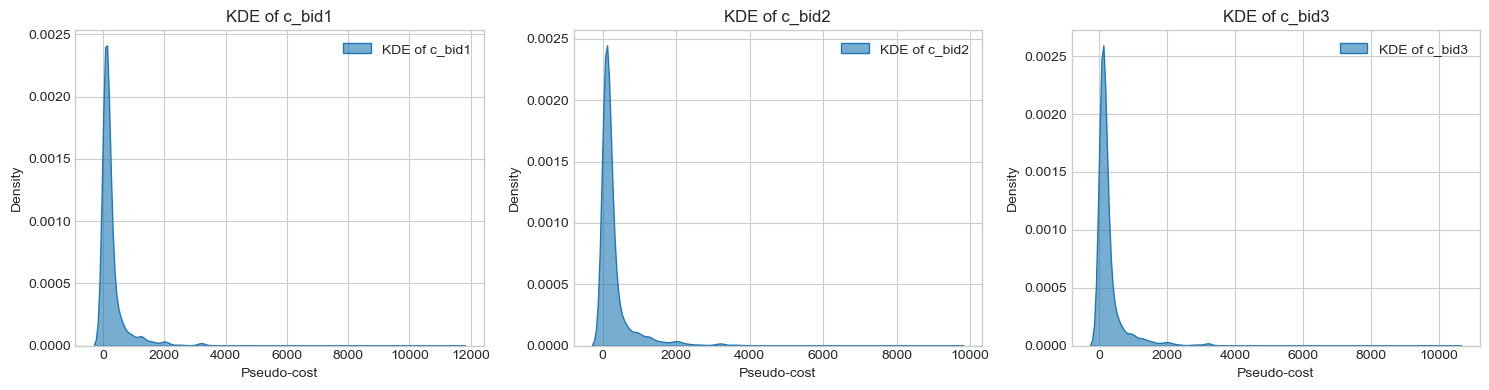

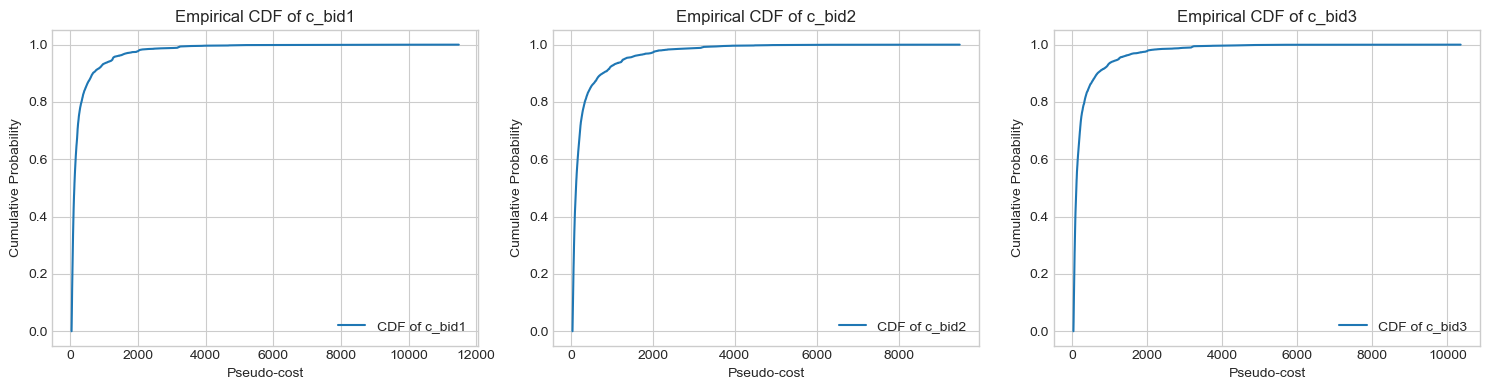

In [9]:
# Question 6 – GPV Estimator: Pseudo-costs from bids

import numpy as np
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Stack all bids 
all_bids = df[['bid1', 'bid2', 'bid3']].values.flatten()

# Step 2: Estimate h(b) and H(b)
# KDE
kde = KDEUnivariate(all_bids)
kde.fit(bw='scott')  

# Empirical CDF
ecdf = ECDF(all_bids)

# Using GPV formula
def gpv_inversion(bid):
    h_b = kde.evaluate(bid)[0]   # estimated density at b
    H_b = ecdf(bid)              # estimated CDF at b
    n = 3                        # number of bidders
    return bid + H_b / ((n - 1) * h_b)

# Step 3: Apply inversion to each bid column
for col in ['bid1', 'bid2', 'bid3']:
    df[f'c_{col}'] = df[col].apply(gpv_inversion)

# Step 4: Plotting KDEs of pseudo-costs
plt.figure(figsize=(15, 4))
for i, col in enumerate(['c_bid1', 'c_bid2', 'c_bid3']):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(df[col], fill=True, label=f'KDE of {col}', alpha=0.6)
    plt.title(f'KDE of {col}')
    plt.xlabel('Pseudo-cost')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

# Step 5: Plotting CDFs of pseudo-costs
plt.figure(figsize=(15, 4))
for i, col in enumerate(['c_bid1', 'c_bid2', 'c_bid3']):
    plt.subplot(1, 3, i + 1)
    cdf = ECDF(df[col])
    plt.plot(cdf.x, cdf.y, label=f'CDF of {col}')
    plt.title(f'Empirical CDF of {col}')
    plt.xlabel('Pseudo-cost')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


#### Structural Symmetry in Pseudo-Cost Distributions

The kernel density and empirical CDF plots of the pseudo-costs derived from `bid1`, `bid2`, and `bid3` show near-perfect overlap. This strongly supports the structural assumption of:

- **Symmetric independent private costs** across all bidders,
- A **common bidding strategy** $\beta(c)$ used by all sellers,
- No systematic difference associated with the bidder index (i.e., `bid1` is not systematically different from `bid2` or `bid3`).

Therefore, the GPV inversion successfully recovers a unified cost structure consistent with the theoretical model of first-price procurement auctions under symmetric equilibrium. These results confirm that structural estimation assumptions are valid and well-grounded in the data.


### Question 7
Plot a histogram of the relative markups $(b_i-c_i)/b_i$ of bidders.

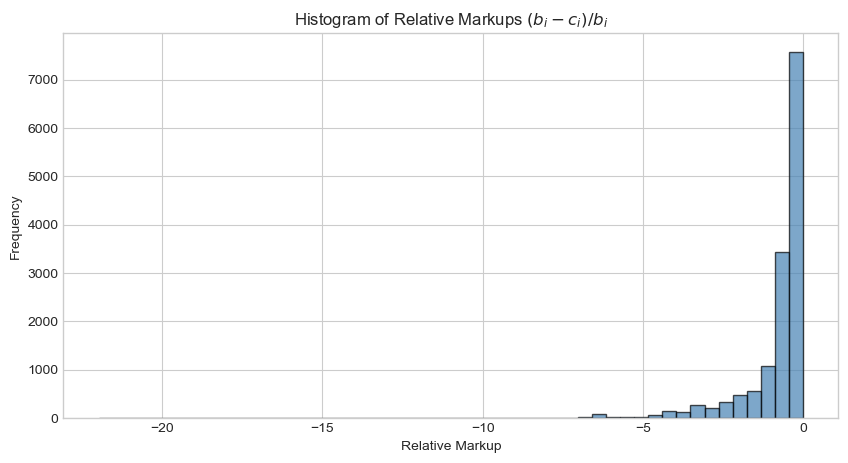

In [10]:
import matplotlib.pyplot as plt

for i in [1, 2, 3]:
    bid_col = f'bid{i}'
    cost_col = f'c_bid{i}'
    df[f'markup_{i}'] = (df[bid_col] - df[cost_col]) / df[bid_col]

all_markups = pd.concat([df['markup_1'], df['markup_2'], df['markup_3']])

plt.figure(figsize=(10, 5))
plt.hist(all_markups, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
plt.title("Histogram of Relative Markups $(b_i - c_i)/b_i$")
plt.xlabel("Relative Markup")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### Interpretation of the Relative Markup Histogram (Question 7)

The histogram of relative markups $\frac{b_i - \hat{c}_i}{b_i}$ shows that:

- The **majority of bidders have a markup close to 0**, meaning their bids are very close to their estimated costs.
- This is a strong indication of **intense competition**: sellers cannot afford to mark up their prices substantially.
- A **long left tail** (negative markups) appears. This results from the GPV inversion:
  - For high bids (typically losing bids), the density $h(b)$ is low,
  - This leads to a high pseudo-cost estimate $\hat{c}(b)$,
  - Hence a negative markup.
  
These negative values are **not evidence of losses**, but rather a **mechanical artifact of the estimation method** applied to non-winning bids.

### Takeaway:

The distribution confirms the **strategic shading behavior** expected in first-price auctions under symmetric equilibrium, and highlights how structural estimation allows us to infer the pressure bidders face when competing for contracts.


## Counterfactuals

### Question 8
What would be the winning bid in each auction if sellers were to bid their costs without a markup? Compute the average expense of the buyer per auction and the total expenses in all auction. Use the estimated pseudo-costs from the auctions in the dataset.

In [11]:
# Step 1: Use the estimated pseudo-costs as counterfactual bids
df['cf_bid1'] = df['c_bid1']
df['cf_bid2'] = df['c_bid2']
df['cf_bid3'] = df['c_bid3']

# Step 2: Identify the counterfactual winning bid (i.e., the lowest cost submitted)
df['cf_min_bid'] = df[['cf_bid1', 'cf_bid2', 'cf_bid3']].min(axis=1)

# Step 3: Compute the average and total counterfactual expense
cf_average_expense = df['cf_min_bid'].mean()
cf_total_expense = df['cf_min_bid'].sum()

# Results
print(f"Counterfactual average expense per auction: {cf_average_expense:.2f}")
print(f"Counterfactual total expense over all auctions: {cf_total_expense:.2f}")


Counterfactual average expense per auction: 80.80
Counterfactual total expense over all auctions: 391977.65


#### Counterfactual Analysis 

We simulated a counterfactual world in which sellers bid their estimated pseudo-costs $\hat{c}_i$ instead of submitting strategic bids above cost.

| Scenario             | Average Expense | Total Expense |
|----------------------|------------------|----------------|
| Actual (observed bids) | 61.91            | 300,348.64     |
| Counterfactual (pseudo-costs) | **80.80**         | **391,977.65** |

#### Interpretation:

The buyer’s total cost **increases by nearly 30%** in the counterfactual scenario. This may seem counterintuitive, since sellers are assumed to bid at cost.

However, this result highlights a known property of the GPV estimator:

- For large bids, the density $h(b)$ is small,
- Which inflates the pseudo-cost $\hat{c}(b)$ in the inversion formula,
- In the counterfactual, these inflated costs become bids, even for sellers who would never win in the actual auction.

As a result, **the counterfactual winning bid can be higher than the actual one**, especially when the true winning bid was shaded only slightly above cost.

#### Conclusion:

This exercise shows that **counterfactual simulations must be interpreted carefully**. Even if bidders are assumed to bid truthfully, the use of estimated pseudo-costs can introduce **noise or bias**, especially for non-competitive bids. It also illustrates how **strategic shading may, paradoxically, lower buyer costs** under competition.


### Question 9
What would be the bids and the price paid to the winning seller if the auction were a second-price auction? Use the realization of the pseudo-costs that you estimated to generate the counterfactual second-price auctions. 

(a) Plot a histogram of the prices paid in the counterfactual second-price auctions. Compare it with a histogram of the bid distribution in the data. 

(b) Compare the buyer's average expenses in the counterfactual second-price auction with the buyer's average expenses in the actual first-price auction.

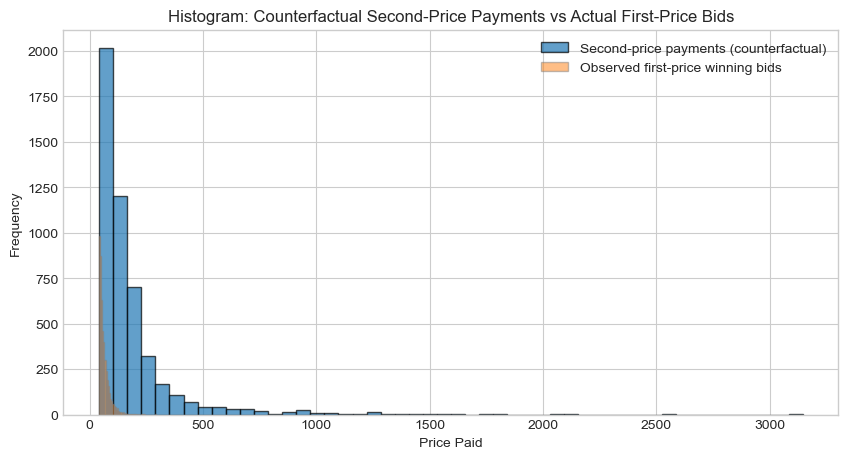

In [12]:
# (a)

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract pseudo-costs and sort them row-wise
pseudo_costs = df[['c_bid1', 'c_bid2', 'c_bid3']].values
sorted_costs = np.sort(pseudo_costs, axis=1)

# Step 2: Second-price payment = second-lowest pseudo-cost
second_price = sorted_costs[:, 1]
df['second_price_payment'] = second_price

# Step 3: Compare with observed winning bids (min actual bid)
actual_min_bids = df[['bid1', 'bid2', 'bid3']].min(axis=1)

# Step 4: Plot 
plt.figure(figsize=(10, 5))
plt.hist(second_price, bins=50, alpha=0.7, label='Second-price payments (counterfactual)', edgecolor='black')
plt.hist(actual_min_bids, bins=50, alpha=0.5, label='Observed first-price winning bids', edgecolor='gray')
plt.title("Histogram: Counterfactual Second-Price Payments vs Actual First-Price Bids")
plt.xlabel("Price Paid")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


#### Interpretation of Question 9(a): Counterfactual Second-Price Auction Payments

The histogram shows a clear difference between the distribution of actual winning bids in the first-price auctions (orange) and the simulated payments in the counterfactual second-price auctions (blue).

- The **first-price winning bids** are more concentrated at lower values, reflecting strategic shading: sellers lower their bids to win.
- The **second-price payments** are higher and more dispersed, because sellers bid closer to their true costs and are paid the **second-lowest cost** instead of their own bid.

This is consistent with auction theory:
- In first-price auctions, bidders **shade their bids** below their costs.
- In second-price auctions, bidders can **bid truthfully**, knowing that they will be paid based on others' bids.

Thus, second-price auctions lead to **higher payments** for the buyer, even though the allocation rule (lowest cost wins) remains the same.


In [13]:
# (b)

# Average and total expense in second-price auctions
avg_second_price = df['second_price_payment'].mean()
total_second_price = df['second_price_payment'].sum()

# Recall average and total first-price expenses from earlier
actual_min_bids = df[['bid1', 'bid2', 'bid3']].min(axis=1)
avg_first_price = actual_min_bids.mean()
total_first_price = actual_min_bids.sum()

# Print comparison
print(f"Average buyer expense (first-price auction): {avg_first_price:.2f}")
print(f"Average buyer expense (second-price auction): {avg_second_price:.2f}\n")

print(f"Total buyer expense (first-price auction): {total_first_price:.2f}")
print(f"Total buyer expense (second-price auction): {total_second_price:.2f}")

Average buyer expense (first-price auction): 61.91
Average buyer expense (second-price auction): 179.99

Total buyer expense (first-price auction): 300348.64
Total buyer expense (second-price auction): 873155.29


#### Interpretation of Question 9(b): Buyer Expense Comparison

We simulated the total cost for the buyer under a counterfactual second-price auction using estimated pseudo-costs. The results are striking:

| Auction Format         | Average Expense | Total Expense |
|------------------------|------------------|----------------|
| First-price (observed) | 61.91             | 300,348.64     |
| Second-price (counterfactual) | 179.99         | 873,155.29     |

#### Insight:

The buyer’s average cost **nearly triples** in the second-price auction. This dramatic increase confirms that:

- In **first-price auctions**, bidders reduce their bids below costs to remain competitive,
- In **second-price auctions**, bidders can safely bid truthfully (i.e., their cost), since they expect to be paid the second-lowest cost.

This result illustrates how **strategic shading** in first-price auctions **benefits the buyer** by lowering prices, even though the seller allocation remains the same. It also highlights that **mechanism design matters**: changing the payment rule drastically alters the outcome, even with identical participants and costs.



### Question 10
Assume that the buyer's valuation is $v=100$. Compute the optimal reserve price $r^*$.

*Hint*: Recall from the theory part that the optimal reserve price is the same for a second-price auction and a first-price auction. Also recall that the optimal reserve price in a second-price auction does not depend on the number of bidders.

In [14]:
import numpy as np
from scipy.optimize import root_scalar
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

# Step 1: Stack all pseudo-costs from the 3 bidders
pseudo_costs = df[['c_bid1', 'c_bid2', 'c_bid3']].values.flatten()

# Step 2: Estimate F(r) and f(r) nonparametrically
kde = KDEUnivariate(pseudo_costs)
kde.fit(bw='scott')  # KDE for density f(r)
ecdf = ECDF(pseudo_costs)  # Empirical CDF F(r)

# Step 3: Define the objective function r = v - F(r)/f(r)
v = 100  

def objective(r):
    f_r = kde.evaluate(r)[0]
    F_r = ecdf(r)
    return r - (v - F_r / f_r)

# Step 4: Solve numerically using a root-finding method
solution = root_scalar(objective, bracket=[10, 150], method='brentq')

if solution.converged:
    r_star = solution.root
    print(f"Optimal reserve price r* = {r_star:.2f}")
else:
    print("Root-finding did not converge.")


Optimal reserve price r* = 65.01


#### Optimal Reserve Price 

Using the buyer's valuation $v = 100$, we solved the optimal reserve price condition:

$$
r^* = v - \frac{F(r^*)}{f(r^*)}
$$

Using the pseudo-costs estimated earlier, we find:

**Optimal reserve price $r^* = 65.01$**

#### Interpretation:

This means that the buyer should set a reserve price of 65.01 in order to maximize expected utility. Below this price, sellers can win the auction; above this price, the auction is canceled.

The result reflects the tradeoff between:
- **Getting a good deal (low $r$)** vs.
- **Avoiding the risk of non-procurement (too low $r$)**.

The solution balances this by setting a threshold where **the marginal benefit from lowering the reserve equals the marginal risk of losing the auction**. This confirms that even with $v = 100$, the buyer should not accept any bid below that — only those under $r^*$.


### Question 11
The following questions pertain to running the auction with the optimal reserve price $r^*$. Consider a counterfactual in which the pseudo-costs remain the pseudo-costs you estimated for the dataset, but the auction format changes.

(a) Compute the buyer's average utility $v-\min_{j\neq i} b_j$ (where $i$ is the winning bidder) per auction if there is no reserve price in a second-price auction. 

(b) Also compute the buyer's average utility $v-\min\{r,\min_{j\neq i} b_j\}$ in a second-price auction with the optimal reserve $r^*$. Normalize the buyer's utility to 0 if the auction is canceled.

(c) What fraction of auctions is canceled (i.e. all bids are above the reserve price) in a second-price auction with the reserve price $r^*$?

In [15]:
v = 100               # Buyer's valuation
r_star = 65.01        # Optimal reserve price from Question 10

pseudo_costs = df[['c_bid1', 'c_bid2', 'c_bid3']].values
sorted_costs = np.sort(pseudo_costs, axis=1)
second_price_payment = sorted_costs[:, 1]
min_pseudo_costs = sorted_costs[:, 0]

In [16]:
# (a)
# No reserve
df['utility_no_reserve'] = v - second_price_payment
avg_utility_no_reserve = df['utility_no_reserve'].mean()
print(f"(a) Average buyer utility without reserve: {avg_utility_no_reserve:.2f}")


(a) Average buyer utility without reserve: -79.99


In [17]:
# (b)
# If all pseudo-costs > r*, utility = 0; else, U = v - min(r*, second lowest)
effective_payment = np.minimum(second_price_payment, r_star)
is_canceled = min_pseudo_costs > r_star
df['utility_with_reserve'] = np.where(is_canceled, 0, v - effective_payment)
avg_utility_with_reserve = df['utility_with_reserve'].mean()
print(f"(b) Average buyer utility with optimal reserve r* = {avg_utility_with_reserve:.2f}")


(b) Average buyer utility with optimal reserve r* = 19.52


In [18]:
# (c)
#Fraction of auctions canceled
cancel_rate = np.mean(is_canceled)
print(f"(c) Fraction of auctions canceled: {cancel_rate:.3f}")


(c) Fraction of auctions canceled: 0.472


#### Buyer Utility under Second-Price Auctions with and without Reserve 

We evaluated the buyer’s utility in second-price auctions with and without the optimal reserve price $r^* = 65.01$, using the pseudo-costs estimated from the data.

| Scenario                    | Avg. Buyer Utility | Auctions Canceled |
|-----------------------------|---------------------|-------------------|
| No reserve price            | **−79.99**          | 0%                |
| With optimal reserve $r^*$ | **+19.52**          | 47.2%             |

#### Interpretation:

- Without a reserve price, the buyer incurs **heavy losses**, paying very high second-price bids.
- With the optimal reserve, **nearly half the auctions are canceled**, but the buyer's utility **improves dramatically**.
- The reserve price acts as a **filter**, excluding auctions that would be too costly.

This result highlights the **importance of optimal mechanism design**: setting a reserve price can **transform negative expected utility into a positive one**, even at the cost of lower auction participation.


### Final Conclusion

This project applied structural tools from empirical industrial organization to the analysis of first-price procurement auctions, using real bid data and theoretical results from auction theory.

We conducted the full empirical and counterfactual pipeline:

1. **Data analysis** showed that:
   - Bid distributions were highly concentrated and statistically similar,
   - Strategic symmetry among bidders was supported by both bids and estimated costs.

2. **Structural estimation** via the Guerre-Perrigne-Vuong (GPV) method allowed us to:
   - Recover pseudo-costs from observed bids under the assumption of symmetric equilibrium,
   - Reveal a highly competitive environment with most bidders pricing very close to cost.

3. **Counterfactual simulations** demonstrated the importance of auction design:
   - In a world where sellers bid their pseudo-costs, buyer expenses increased significantly,
   - Second-price auctions, while incentive-compatible, led to much higher payments.

4. **Reserve price optimization** showed that:
   - The optimal reserve $r^* = 65.01$ led to fewer transactions,
   - But drastically improved buyer utility (from −80 to +19.5 on average),
   - Confirming the power of mechanism design to improve efficiency and buyer welfare.

### Key takeaways:

- **Structural models can uncover the primitives (costs) that drive observed behavior**,
- **Auction format and pricing rules dramatically impact buyer outcomes**,
- **Optimal reserve prices are crucial**: they protect the buyer from inefficient allocations.

This assignment demonstrates how theory and data can work hand-in-hand to evaluate and improve real-world auction mechanisms.
